In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Define Linear regression model

In [2]:
class LinearRegression(tf.keras.Model):
    def __init__(self, num_inputs, num_outputs):
        super(LinearRegression, self).__init__()
        self.W = tf.Variable(
            tf.random_normal_initializer()((num_inputs, num_outputs))
        )
        self.b = tf.Variable(tf.zeros(num_outputs))
        self.params = [self.W, self.b]
        
    def call(self, inputs):
        return tf.matmul(inputs, self.W) + self.b

## Create dataset

In [3]:
N = 100
D = 1
K = 1
X = np.random.random((N, D)) * 2 - 1
w = np.random.randn(D, K)
b = np.random.randn()
Y = X.dot(w) + b + np.random.randn(N, 1) * 0.1

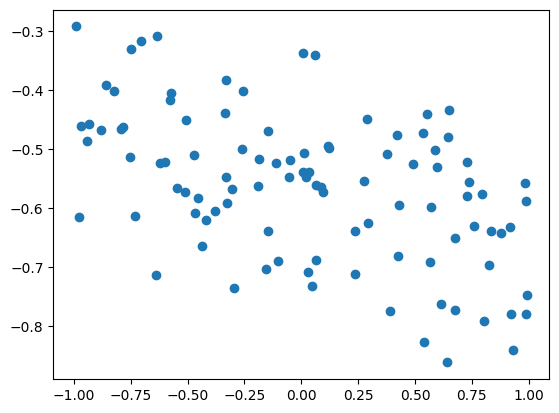

In [4]:
plt.scatter(X, Y)

In [5]:
# Cast type
X = X.astype(np.float32)
Y = Y.astype(np.float32)

## Define the loss

In [6]:
def get_loss(model, inputs, targets):
    predictions = model(inputs)
    error = targets - predictions
    return tf.reduce_mean(tf.square(error))    # RMSE

## Gradient function

In [7]:
def get_grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        # calculate the loss
        loss_value = get_loss(model, inputs, targets)
    # return gradient
    return tape.gradient(loss_value, model.params)

## Create and train model

In [8]:
model = LinearRegression(D, K)

# print params before training
print('Initial params: ')
print(model.W)
print(model.b)

Initial params: 
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.0064049]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [9]:
# store the losses here
losses = []

# create an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)

# run training loop
for i in range(100):
    # get gradients
    grads = get_grad(model, X, Y)
    
    # do one step of gradient descent
    # param = params - learning_rate * grad
    optimizer.apply_gradients(zip(grads, model.params))
    
    # store the loss
    loss = get_loss(model, X, Y)
    losses.append(loss)

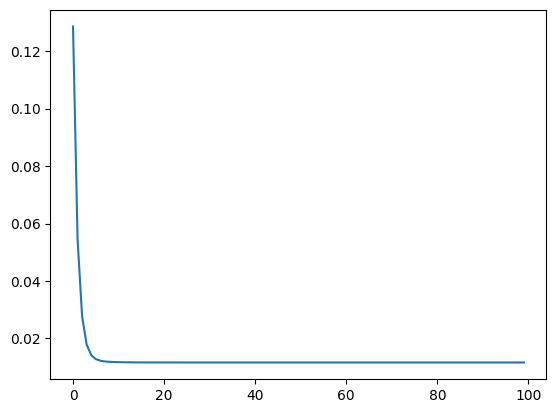

In [10]:
plt.plot(losses)

4/4 [==============================] - 0s 5ms/step


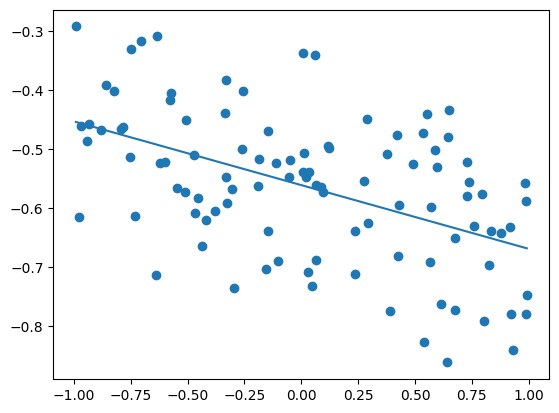

In [11]:
x_axis = np.linspace(X.min(), X.max(), 100)
y_axis = model.predict(x_axis.reshape(-1, 1)).flatten()

plt.scatter(X, Y)
plt.plot(x_axis, y_axis)

In [12]:
print('Predicted params:')
print(model.W)
print(model.b)

Predicted params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-0.10787608]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.56079566], dtype=float32)>


In [13]:
w, b

(array([[-0.12412883]]), -0.5699951515465719)